# Animated FFT Plots

In [1]:
import time
import cmath

from IPython.display import clear_output

import numpy as np
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns
sns.set_context('talk')

In [3]:
from neurodsp.utils import set_random_seed
set_random_seed(505)

## FFT Functions

In [4]:
def decompose_fft(data, threshold=0., max_n_waves=np.inf):
    """
    
    Parameters:
    data, threshold, max_n_waves
    
    Returns:
    sines, freqs, phases, powers
    
    Notes
    -----
    # Adapted from: 
    https://stackoverflow.com/questions/59725933/plot-fft-as-a-set-of-sine-waves-in-python
    """
    
    fft3 = np.fft.fft(data)
    x = np.arange(0, 10, 10 / len(data))
    freqs = np.fft.fftfreq(len(x), .01)
    
    sines = np.empty([0, len(x)])
    phases = []
    powers = []
        
    for ind in range(len(fft3)):
        
        if ind > max_n_waves:
            break
            
        power = abs(fft3[ind])
        phase = cmath.phase(fft3[ind])
        coeff = 2 if ind == 0 else 1
        
        if power / len(x) > threshold:
            
            sinewave = 1/(len(x)*coeff/2) * \
                (power * np.cos(freqs[ind]*2*np.pi*x+phase))
            
            sines = np.vstack([sines, sinewave])
            
            phases.append(phase)
            powers.append(power)
            
    return sines, freqs, phases, powers

## Plot Functions

In [5]:
def plot_sines(sines, ax=None):
    """Plot individual sine waves."""
    
    if not ax:
        _, ax = plt.subplots()

    for sine in sines:
        ax.plot(sine, alpha=0.5)
        
    ax.set(xticks=[], yticks=[])

In [107]:
def plot_recomb(sines, data, ax=None):
    """Plot recombined sine waves."""
    
    if not ax:
        _, ax = plt.subplots()
    
    ax.plot(np.sum(sines, 0), color='red')
    if np.any(data):
        ax.plot(data, color='black')
        ax.set_ylim([np.min(data)-0.25 , np.max(data)+0.25])

    ax.set(xticks=[], yticks=[])

In [83]:
def plot_phases(phases, ax=None):
    """Plot phase distribution."""
    
    if not ax:
        fig = plt.figure()
        ax = fig.add_subplot(111, polar=True)

    for phase in phases:
        ax.plot([0, phase], [0, 1], lw=4, alpha=0.5)

    ax.set(xticklabels=[], yticklabels=[]);

In [91]:
from itertools import cycle
COLORS_DEF = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])
COLORS_LST = [next(COLORS_DEF) for ind in range(10000)]

def plot_powers(freqs, powers, log_powers=False, ax=None):
    """Plot power distribution."""
    
    if not ax:
        _, ax = plt.subplots(figsize=(5, 5))
        
    if log_powers:
        powers = np.log10(powers)
        
    ax.scatter(freqs, powers, c=COLORS_LST[0:len(freqs)])
    ax.set(xticks=[], yticks=[]);

## Build Functions

In [42]:
def build_sines(sines, n_build=np.inf, sleep=0.05):
    """Build the sine wave plot (animated)."""
    
    for ind in range(min(sines.shape[0], n_build)):
        
        clear_output(wait=True)
        plot_sines(sines[0:ind, :])
        
        plt.show();
        time.sleep(sleep)

In [100]:
def build_recomb(sines, data, n_build=np.inf, sleep=0.05):
    """Build the recombined wave plot (animated)."""
    
    for ind in range(min(sines.shape[0], n_build)):
        
        clear_output(wait=True)
        
        plot_recomb(sines[0:ind, :], data)
        
        plt.show();
        time.sleep(sleep)

In [11]:
def build_phases(phases, n_build=np.inf, sleep=0.05):
    """Build the phase plot (animated)."""
    
    for ind in range(min(len(phases), n_build)):
        clear_output(wait=True)
        plot_phases(phases[0:ind])
        plt.show();
        time.sleep(sleep)

In [12]:
def build_powers(freqs, powers, n_build=np.inf, sleep=0.05):
    """Build the powers plot (animated)."""
    
    for ind in range(min(len(phases), n_build)):
        clear_output(wait=True)
        plot_powers(freqs[0:ind], powers[0:ind])
        plt.show();
        time.sleep(sleep)

In [13]:
def build_params(freqs, phases, powers, n_build=np.inf, sleep=0.05):
    """Build param plots together."""

    for ind in range(min(n_build, len(phases))):

        clear_output(wait=True)

        fig = plt.figure()
        ax1 = fig.add_axes([0, 0.0, 0.5, 0.5]) 
        ax2 = fig.add_axes([0, 0.6, 0.5, 0.5], polar=True)
    
        plot_powers(freqs[0:ind], powers[0:ind], ax=ax1)
        plot_phases(phases[0:ind], ax=ax2)

        plt.show();
        time.sleep(sleep)

In [14]:
def build_sigs(sines, data, n_build=np.inf, sleep=0.05):
    """Build signal plots together."""
    
    for ind in range(min(n_build, sines.shape[0])):

        clear_output(wait=True)

        fig = plt.figure()
        ax1 = fig.add_axes([0.0, 0.6, 1.3, 0.5])
        ax2 = fig.add_axes([0.0, 0.0, 1.3, 0.5])

        plot_sines(sines[0:ind, :], ax=ax1)
        plot_recomb(sines[0:ind, :], data, ax=ax2)
        
        plt.show();
        time.sleep(sleep)

In [94]:
def make_axes():
    """Make axes for combined plot.
    
    Notes:
    Placement definitions: Left, Bottom, Width, Height
    """
    
    fig = plt.figure()
    ax1 = fig.add_axes([0.0, 0.6, 1.3, 0.5])
    ax2 = fig.add_axes([0.0, 0.0, 1.3, 0.5])
    ax3 = fig.add_axes([1.5, 0.0, 0.5, 0.5]) 
    ax4 = fig.add_axes([1.5, 0.6, 0.5, 0.5], polar=True)
    
    return fig, [ax1, ax2, ax3, ax4]


def build_all(sines, freqs, phases, powers, n_build=np.inf,
              sleep=0.05, save=False):
    """Build all plots together."""

    for ind in range(min(n_build, sines.shape[0])):

        clear_output(wait=True)

        fig, axes = make_axes()

        plot_sines(sines[0:ind, :], ax=axes[0])
        plot_recomb(sines[0:ind, :], data, ax=axes[1])
        plot_powers(freqs[0:ind], powers[0:ind], log_powers=True, ax=axes[2])
        plot_phases(phases[0:ind], ax=axes[3])

        if save:
            fig.savefig('gif/gif_' + str(ind), bbox_inches="tight", dpi=300)
            plt.close()
        else:
            plt.show();
            time.sleep(sleep)

## Simulate Data

In [16]:
from neurodsp.sim import sim_combined
from neurodsp.utils import create_times

In [17]:
fs = 1000
n_seconds = 100
comps = {'sim_powerlaw' : {'exponent' : -1.75, 'f_range' : (1.4, 75)}, 
         'sim_bursty_oscillation' : {'freq' : 10, 'leave_burst' : 0.4}}
comp_vars = [1, 1]

times = create_times(n_seconds, fs)

sig = sim_combined(n_seconds, fs, comps, comp_vars)

### Test

In [18]:
data = sig[:1000]

In [19]:
sines, freqs, phases, powers = decompose_fft(data)

### Plot individual builds

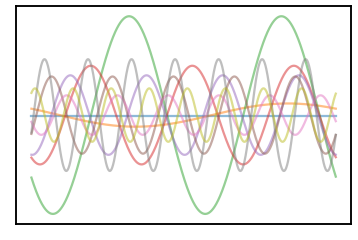

In [43]:
build_sines(sines, n_build=10)

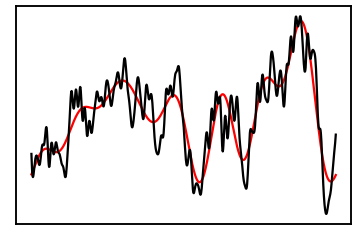

In [63]:
build_recomb(sines, data, n_build=10)

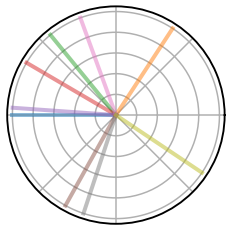

In [22]:
build_phases(phases, n_build=10)

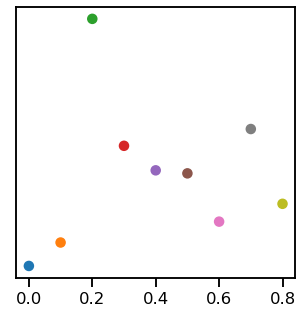

In [23]:
build_powers(freqs, powers, n_build=10)

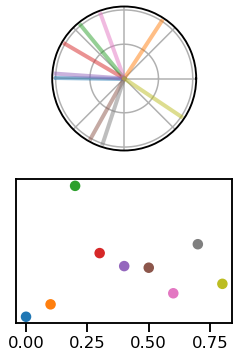

In [24]:
build_params(freqs, phases, powers, n_build=10)

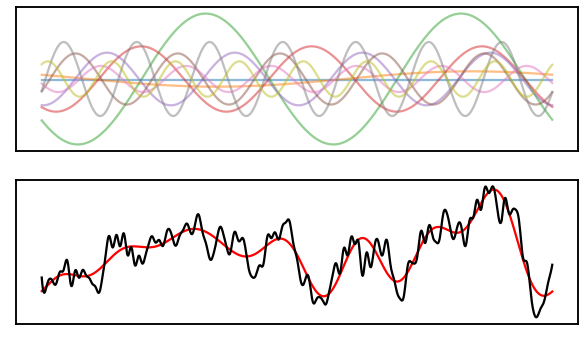

In [25]:
build_sigs(sines, data, n_build=10)

## Apply it!

In [92]:
data = sig[0:1000]
sines, freqs, phases, powers = decompose_fft(data)

In [109]:
build_all(sines, freqs, phases, powers, n_build=75, save=True)

In [110]:
data = sig[1000:2000]
sines, freqs, phases, powers = decompose_fft(data)

In [111]:
build_all(sines, freqs, phases, powers, n_build=75, save=True)

## Explore on simulated waves

In [30]:
from neurodsp.sim import sim_oscillation

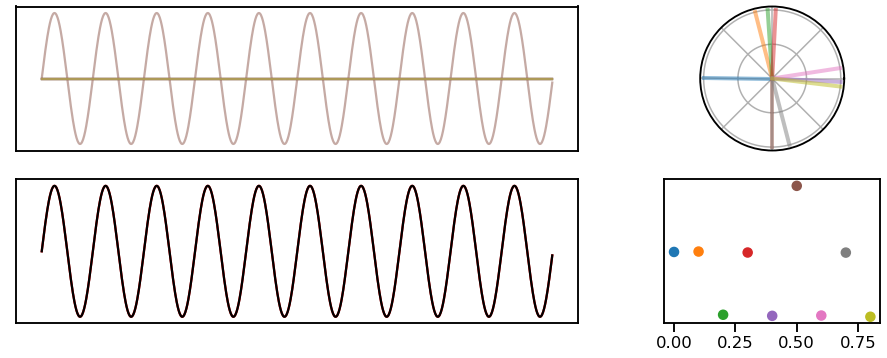

In [31]:
osc1 = sim_oscillation(1, 1000, 10, cycle='sine')
data = osc1[:1000]
sines, freqs, phases, powers = decompose_fft(data, threshold=0.0)
build_all(sines, freqs, phases, powers, n_build=10)

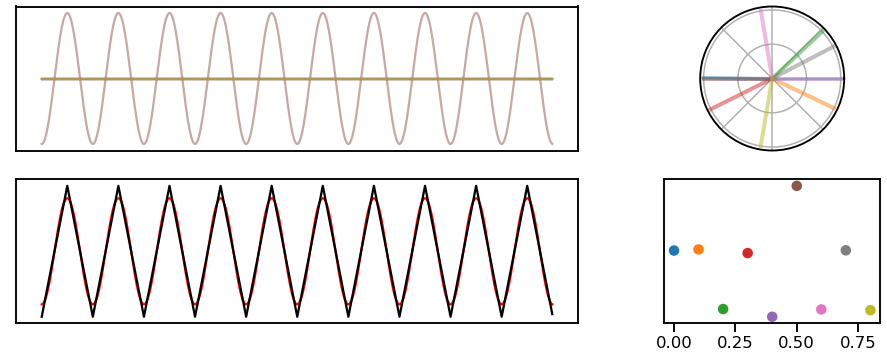

In [32]:
osc2 = sim_oscillation(1, 1000, 10, cycle='sawtooth', width=0.5)
data = osc2[:1000]
sines, freqs, phases, powers = decompose_fft(data, threshold=0.0)
build_all(sines, freqs, phases, powers, n_build=10)

## Explorations with holding

In [33]:
def _build_powers(freqs, powers, n_build, sleep, ax=None):
    
    for ind in range(min(len(phases), n_build)):
        
        clear_output(wait=True)
        plot_powers(freqs[0:ind], powers[0:ind], ax=ax)
        plt.show();
        time.sleep(sleep)
        
        yield

def build_powers3(freqs, powers, n_build=np.inf, sleep=0.05, hold=False, ax=None):
    """Build the powers plot (animated)."""
    
    return check_hold(_build_powers(freqs, powers, n_build, sleep, ax), hold)
    
    
def hold_build(build_func, *build_args, **build_kwargs):
    
    yield build_func(*build_args, **build_kwargs)
    
def check_hold(call, hold):
    """Check if a plot is held for manual updating."""
        
    if hold:
        return call
    else:
        try: 
            while True:
                next(call)
        except:
            pass